# Group 4 BM2020C - Real Estate

## <font color=maroon> **Real Estate Company** </font>

In this project, we choose 4 companies: 
- PT Bakrieland Development Tbk (ELTY.JK)
- PT Aksara Global Development Tbk (GAMA.JK)
- PT Summarecon Agung Tbk (SMRA.JK)
- PT Alam Sutera Realty Tbk (ASRI.JK)

## <font color=maroon> **Data** </font>

In [1]:
from __future__ import print_function
import os
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

### <font color=orange> **ELTY.JK** </font>

### <font color=green> **Step 1 : Import Data** </font>

In [2]:
pd.read_csv('ELTY.JK.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,500.0,500.0,500.0,500.0,500.0,990.0
1,2017-07-24,500.0,500.0,500.0,500.0,500.0,42400.0
2,2017-07-31,500.0,500.0,500.0,500.0,500.0,135650.0
3,2017-08-07,500.0,500.0,500.0,500.0,500.0,33420.0
4,2017-08-14,500.0,500.0,500.0,500.0,500.0,5830.0
...,...,...,...,...,...,...,...
257,2022-06-20,50.0,50.0,50.0,50.0,50.0,402700.0
258,2022-06-27,50.0,50.0,50.0,50.0,50.0,101200.0
259,2022-07-04,50.0,50.0,50.0,50.0,50.0,500.0
260,2022-07-11,50.0,50.0,50.0,50.0,50.0,200.0


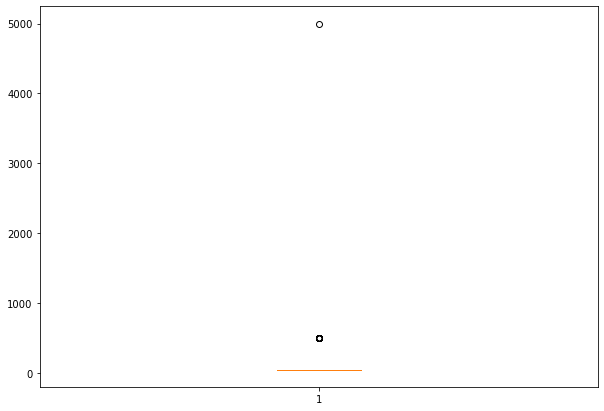

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_elty =  pd.read_csv('ELTY.JK.csv')
df_elty = df_elty[['Date','Close']]
df_elty.index = df_elty['Date']

nan = (pd.isnull(df_elty['Date'])) | (pd.isnull(df_elty['Close']))
df_elty = df_elty.loc[~nan, :]

fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_elty["Close"])

plt.show()

### <font color=green> **Step 2 : Data Cleaning** </font>

In [4]:
q1 = np.quantile(df_elty['Close'], 0.25)
q3 = np.quantile(df_elty['Close'], 0.75)
med = np.median(df_elty['Close'])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = df_elty['Close'][(df_elty['Close'] < lower_bound) | (df_elty['Close'] > upper_bound)]

print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:Date
2017-07-17     500.0
2017-07-24     500.0
2017-07-31     500.0
2017-08-07     500.0
2017-08-14     500.0
2017-08-21     500.0
2017-08-28     500.0
2017-09-04     500.0
2017-09-11     500.0
2017-09-18     500.0
2017-09-25     500.0
2017-10-02     500.0
2017-10-09     500.0
2017-10-16     500.0
2017-10-23     500.0
2017-10-30     500.0
2017-11-06     500.0
2017-11-13     500.0
2017-11-20     500.0
2017-11-27     500.0
2017-12-04     500.0
2017-12-11     500.0
2017-12-18     500.0
2017-12-25     500.0
2018-01-01     500.0
2018-01-08     500.0
2018-01-15     500.0
2018-01-22     500.0
2018-01-29     500.0
2018-02-05     500.0
2018-02-12     500.0
2018-02-19     500.0
2018-02-26     500.0
2018-03-05     500.0
2018-03-12     500.0
2018-03-19     500.0
2018-03-26     500.0
2018-04-02     500.0
2018-04-09     500.0
2018-04-16     500.0
2018-04-23     500.0
2018-04-30    5000.0
2018-05-07     500.0
2018-05-14     500.0
2018-05-21     500.0
2018

In [5]:
df_elty = df_elty[df_elty.Close != 500.0]
df_elty = df_elty[df_elty.Close != 5000.0]

df_elty

,Date,Close
Date,,
2018-06-04,2018-06-04,50.0
2018-06-11,2018-06-11,50.0
2018-06-18,2018-06-18,50.0
2018-06-25,2018-06-25,50.0
2018-07-02,2018-07-02,50.0
...,...,...
2022-06-13,2022-06-13,50.0
2022-06-20,2022-06-20,50.0
2022-06-27,2022-06-27,50.0


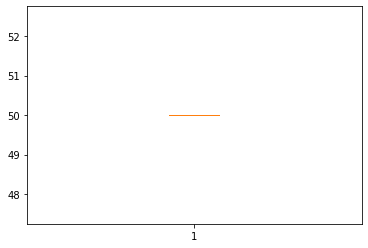

<Figure size 720x504 with 0 Axes>

In [6]:
plt.boxplot(df_elty["Close"])
fig = plt.figure(figsize =(10, 7))
plt.show()

### <font color=green> **Step 3 : Stationary Test** </font>

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
values= df_elty.values
res = adfuller(values[:,1])
print('Augmented Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey_fuller Statistic: nan
p-value: nan


C:\Users\willi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [9]:
values= df_elty.values
res = adfuller(values[:,1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

critical values at different levels:
	1%: -3.461
	5%: -2.875
	10%: -2.574


C:\Users\willi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


After the stationarity test, we know that:
- If outliers are not removed, the result is stationary
- If outliers are removed, the result is stationary.

We can conlcude that ELTY.JK stationary

### <font color=green> **Step 4 : Visualization (Time Series Decomposition)** </font>

<AxesSubplot:xlabel='Date'>

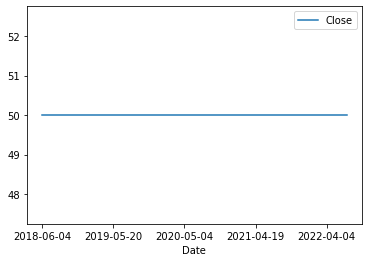

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

#drop null values
df_elty.dropna(inplace=True)
df_elty.plot()

In [11]:
result=seasonal_decompose(df_elty['Close'], model='additive', period=12)

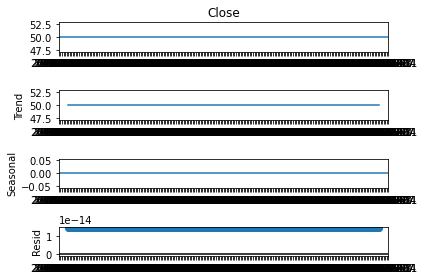

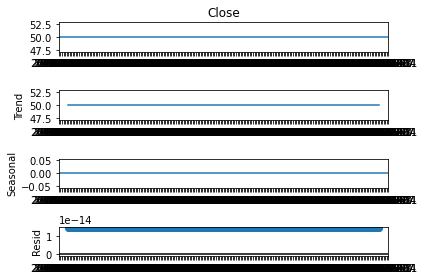

In [12]:
result.plot()

### <font color=orange> **GAMA.JK** </font>

### <font color=green> **Step 1 : Import Data** </font>

In [13]:
pd.read_csv('GAMA.JK.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,50.0,50.0,50.0,50.0,50.0,1000.0
1,2017-07-24,50.0,62.0,50.0,55.0,55.0,330612000.0
2,2017-07-31,55.0,62.0,50.0,50.0,50.0,142100000.0
3,2017-08-07,50.0,51.0,50.0,50.0,50.0,1238400.0
4,2017-08-14,50.0,56.0,50.0,51.0,51.0,41113100.0
...,...,...,...,...,...,...,...
257,2022-06-20,50.0,50.0,50.0,50.0,50.0,1400.0
258,2022-06-27,50.0,50.0,50.0,50.0,50.0,6900.0
259,2022-07-04,50.0,50.0,50.0,50.0,50.0,400.0
260,2022-07-11,50.0,50.0,50.0,50.0,50.0,1500.0


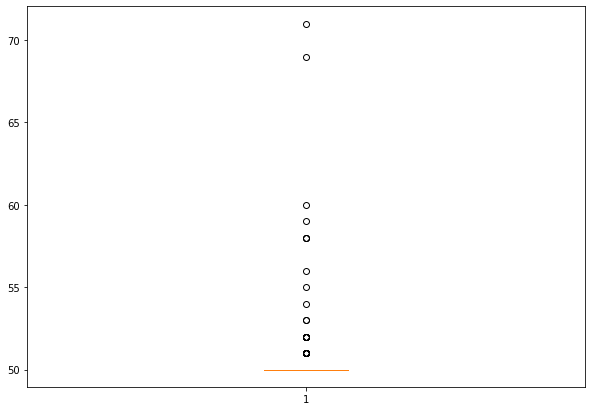

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_gama =  pd.read_csv('GAMA.JK.csv')
df_gama = df_gama[['Date','Close']]
df_gama.index = df_gama['Date']

nan = (pd.isnull(df_gama['Date'])) | (pd.isnull(df_gama['Close']))
df_gama = df_gama.loc[~nan, :]

fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_gama["Close"])

plt.show()

### <font color=green> **Step 2 : Data Cleaning** </font>

In [15]:
q1 = np.quantile(df_gama['Close'], 0.25)
q3 = np.quantile(df_gama['Close'], 0.75)
med = np.median(df_gama['Close'])
iqr = q3-q1
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

outliers = df_gama['Close'][(df_gama['Close'] < lower_bound) | (df_gama['Close'] > upper_bound)]

print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:Date
2017-07-24    55.0
2017-08-14    51.0
2017-12-18    60.0
2017-12-25    69.0
2018-01-01    52.0
2018-01-08    51.0
2018-01-15    51.0
2018-01-22    51.0
2018-01-29    51.0
2018-02-12    52.0
2018-02-19    53.0
2018-02-26    51.0
2018-03-05    52.0
2018-03-26    52.0
2018-04-02    58.0
2018-04-09    56.0
2018-04-16    53.0
2018-04-23    54.0
2018-04-30    52.0
2018-05-07    52.0
2018-05-14    52.0
2018-05-21    51.0
2018-05-28    52.0
2018-06-04    51.0
2018-06-11    51.0
2018-06-18    51.0
2018-06-25    51.0
2018-07-16    51.0
2018-09-10    51.0
2018-09-17    51.0
2018-09-24    51.0
2018-12-17    51.0
2018-12-24    58.0
2018-12-31    51.0
2019-01-14    51.0
2019-01-28    51.0
2019-02-04    51.0
2019-03-11    58.0
2019-03-18    59.0
2019-03-25    71.0
2019-04-01    51.0
2019-04-08    51.0
2019-12-16    51.0
2019-12-23    51.0
Name: Close, dtype: float64


In [16]:
df_gama = df_gama[df_gama.Close != 51.0]
df_gama = df_gama[df_gama.Close != 52.0]
df_gama = df_gama[df_gama.Close != 53.0]
df_gama = df_gama[df_gama.Close != 54.0]
df_gama = df_gama[df_gama.Close != 55.0]
df_gama = df_gama[df_gama.Close != 56.0]
df_gama = df_gama[df_gama.Close != 58.0]
df_gama = df_gama[df_gama.Close != 59.0]
df_gama = df_gama[df_gama.Close != 60.0]
df_gama = df_gama[df_gama.Close != 69.0]
df_gama = df_gama[df_gama.Close != 71.0]

df_gama

,Date,Close
Date,,
2017-07-17,2017-07-17,50.0
2017-07-31,2017-07-31,50.0
2017-08-07,2017-08-07,50.0
2017-08-21,2017-08-21,50.0
2017-08-28,2017-08-28,50.0
...,...,...
2022-06-13,2022-06-13,50.0
2022-06-20,2022-06-20,50.0
2022-06-27,2022-06-27,50.0


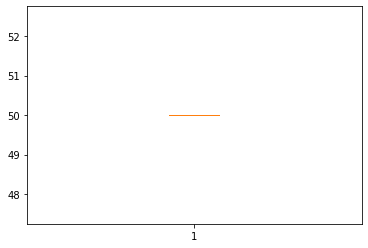

<Figure size 720x504 with 0 Axes>

In [17]:
plt.boxplot(df_gama["Close"])
fig = plt.figure(figsize =(10, 7))
plt.show()

### <font color=green> **Step 3 : Stationary Test** </font> 

In [18]:
from statsmodels.tsa.stattools import adfuller

In [19]:
values= df_gama.values
res = adfuller(values[:,1])
print('Augmented Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey_fuller Statistic: nan
p-value: nan


C:\Users\willi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [20]:
values= df_gama.values
res = adfuller(values[:,1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

critical values at different levels:
	1%: -3.461
	5%: -2.875
	10%: -2.574


C:\Users\willi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


After the stationarity test, we know that:
- If outliers are not removed, the result is stationary
- If outliers are removed, the result is stationary.

We can conlcude that GAMA.JK stationary

### <font color=green> **Step 4 : Visualization (Time Series Decomposition)** </font>

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='Date'>

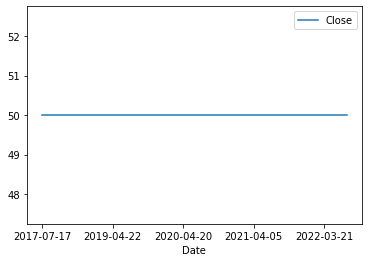

In [22]:
#drop null values
df_gama.dropna(inplace=True)
df_gama.plot()

In [23]:
result=seasonal_decompose(df_gama['Close'], model='additive', period=12)

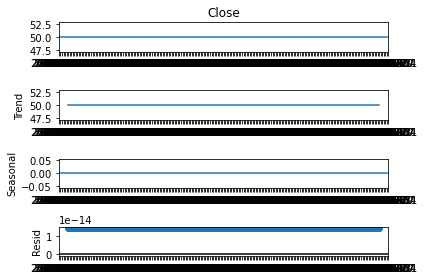

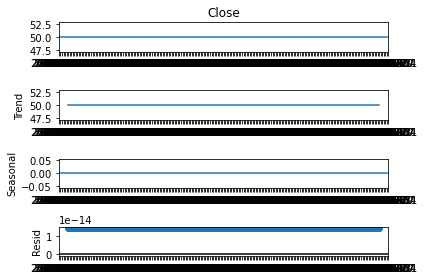

In [24]:
result.plot()

### <font color=orange> **SMRA.JK** </font>

### <font color=green> **Step 1 : Import Data** </font> 

In [25]:
pd.read_csv('SMRA.JK.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,1195.0,1200.0,1060.0,1075.0,1053.760864,178050600.0
1,2017-07-24,1075.0,1090.0,990.0,995.0,975.341492,116547600.0
2,2017-07-31,1005.0,1020.0,975.0,995.0,975.341492,161922300.0
3,2017-08-07,1000.0,1150.0,1000.0,1055.0,1034.156006,256510400.0
4,2017-08-14,1065.0,1140.0,1060.0,1120.0,1097.871826,122056100.0
...,...,...,...,...,...,...,...
257,2022-06-20,605.0,610.0,575.0,585.0,578.559631,139631300.0
258,2022-06-27,585.0,600.0,550.0,570.0,563.724792,138361300.0
259,2022-07-04,570.0,580.0,540.0,555.0,548.889893,174227100.0
260,2022-07-11,565.0,570.0,535.0,545.0,539.000000,117504800.0


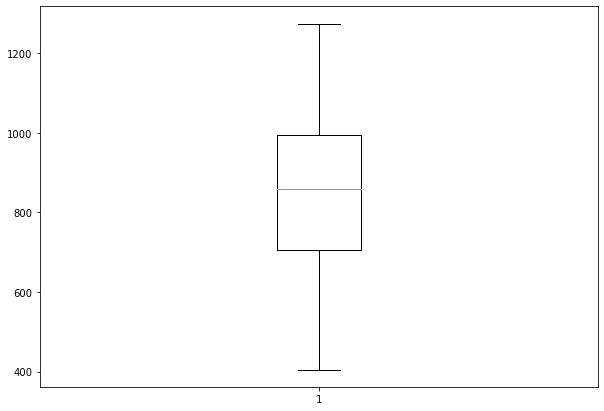

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_smra =  pd.read_csv('SMRA.JK.csv')
df_smra  = df_smra[['Date','Close']]
df_smra .index = df_smra['Date']

nan = (pd.isnull(df_smra['Date'])) | (pd.isnull(df_smra['Close']))
df_smra = df_smra.loc[~nan, :]

fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_smra["Close"])

plt.show()

### <font color=green> **Step 2 : Stationary Test** </font> 

In [27]:
from statsmodels.tsa.stattools import adfuller

In [28]:
values= df_smra.values
res = adfuller(values[:,1])
print('Augmented Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey_fuller Statistic: -2.172984
p-value: 0.216197


In [29]:
values= df_smra.values
res = adfuller(values[:,1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

critical values at different levels:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Based on the stationarity test above, it can be observed that the resulting p-value is 0.216197, which is greater than 0.05. Furthermore, the ADF statistic is higher than the critical values at 1%, 5%, and 10%. Therefore, it can be concluded that SMRA.JK is nonstationary.

### <font color=green> **Step 3 : Visualization (Time Series Decomposition)** </font>

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='Date'>

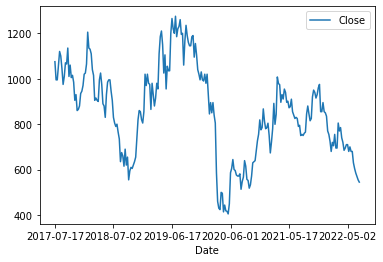

In [31]:
#drop null values
df_smra.dropna(inplace=True)
df_smra.plot()

In [32]:
result=seasonal_decompose(df_smra['Close'], model='additive', period=12)

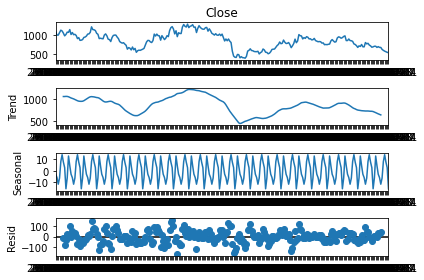

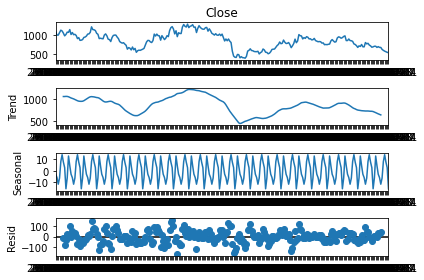

In [33]:
result.plot()

### <font color=orange> **ASRI.JK** </font>

### <font color=green> **Step 1 : Import Data** </font>

In [34]:
pd.read_csv('ASRI.JK.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-17,320.0,328.0,316.0,316.0,316.0,59614400.0
1,2017-07-24,318.0,318.0,302.0,306.0,306.0,82284800.0
2,2017-07-31,308.0,362.0,306.0,354.0,354.0,436772800.0
3,2017-08-07,356.0,366.0,344.0,348.0,348.0,209832900.0
4,2017-08-14,348.0,374.0,348.0,366.0,366.0,163855000.0
...,...,...,...,...,...,...,...
257,2022-06-20,164.0,170.0,161.0,166.0,166.0,78764200.0
258,2022-06-27,170.0,180.0,161.0,163.0,163.0,117180300.0
259,2022-07-04,163.0,166.0,157.0,160.0,160.0,70843200.0
260,2022-07-11,165.0,165.0,158.0,160.0,160.0,64602500.0


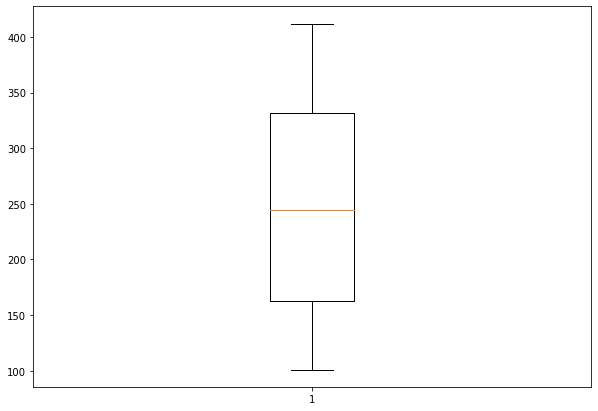

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_asri =  pd.read_csv('ASRI.JK.csv')
df_asri  = df_asri[['Date','Close']]
df_asri .index = df_asri['Date']

nan = (pd.isnull(df_asri['Date'])) | (pd.isnull(df_asri['Close']))
df_asri = df_asri.loc[~nan, :]

fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_asri["Close"])

plt.show()

### <font color=green> **Step 2 : Stationary Test** </font>

In [36]:
values= df_asri.values
res = adfuller(values[:,1])
print('Augmented Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmented Dickey_fuller Statistic: -1.102014
p-value: 0.714268


In [37]:
values= df_asri.values
res = adfuller(values[:,1])
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

critical values at different levels:
	1%: -3.456
	5%: -2.873
	10%: -2.573


Based on the stationarity test above, it can be observed that the resulting p-value is 0.714268, which is greater than 0.05. Additionally, the ADF statistic is higher than the critical values at 1%, 5%, and 10%. Therefore, it can be concluded that ASRI.JK is nonstationary.

### <font color=green> **Step 3 : Visualization (Time Series Decomposition)** </font> 

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

<AxesSubplot:xlabel='Date'>

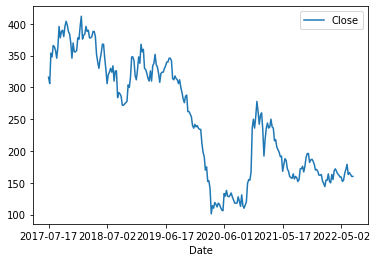

In [39]:
#drop null values
df_asri.dropna(inplace=True)
df_asri.plot()

In [40]:
result=seasonal_decompose(df_asri['Close'], model='additive', period=12)

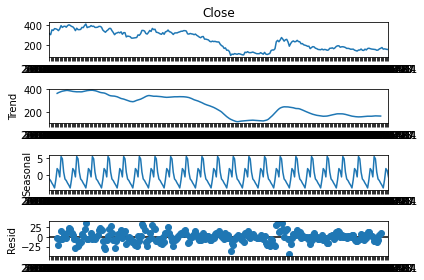

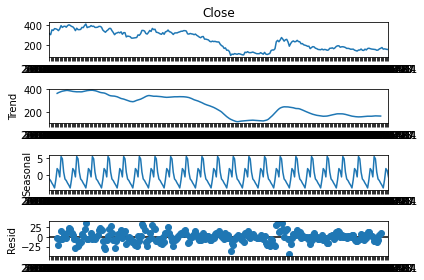

In [41]:
result.plot()

# ELTY & GAMA Single MA

## ELTY

In [42]:
from statsmodels import robust
from sklearn.metrics import mean_squared_error

In [43]:
#klo mau dibedain, bisa ubah nama '2MA' dll. yg penting konsisten diganti semua kebawah
df_elty['MA2'] = df_elty['Close'].rolling(2).mean()
df_elty['MA4'] = df_elty['Close'].rolling(4).mean()
df_elty['MA8'] = df_elty['Close'].rolling(8).mean()
df_elty['MA16'] = df_elty['Close'].rolling(16).mean()
df_elty['MA32'] = df_elty['Close'].rolling(32).mean()

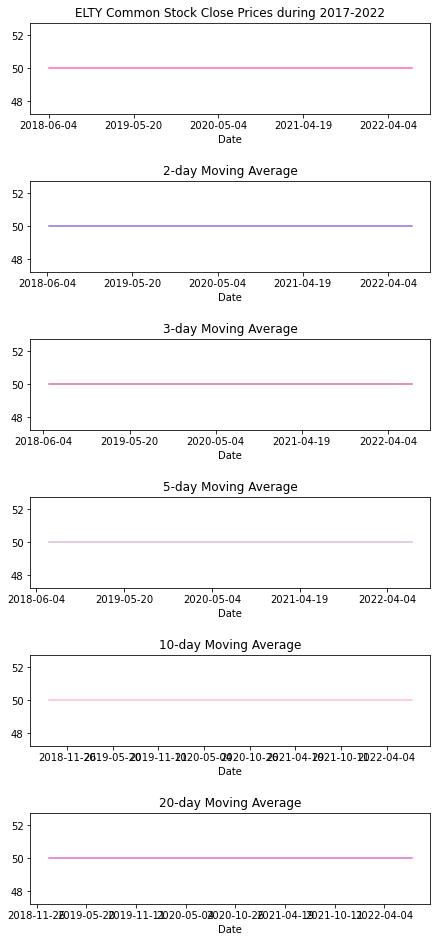

In [44]:
#Yang day, ganti week, soalnya data kita close price per week

# Set figure buat plot
fig = plt.figure(figsize=(6, 13))

# Plot untuk data riil
ax = fig.add_subplot(6,1,1)
df_elty['Close'].plot(ax=ax, color='hotpink')
ax.set_title('ELTY Common Stock Close Prices during 2017-2022')

# Plot untuk 2-day MA
ax = fig.add_subplot(6,1,2)
df_elty['MA2'].plot(ax=ax, color='mediumpurple')
ax.set_title('2-day Moving Average')

# Plot untuk 3-day MA
ax = fig.add_subplot(6,1,3)
df_elty['MA4'].plot(ax=ax, color='palevioletred')
ax.set_title('3-day Moving Average')

# Plot untuk 5-day MA
ax = fig.add_subplot(6,1,4)
df_elty['MA8'].plot(ax=ax, color='thistle')
ax.set_title('5-day Moving Average')

# Plot untuk 10-day MA
ax = fig.add_subplot(6,1,5)
df_elty['MA16'].plot(ax=ax, color='pink')
ax.set_title('10-day Moving Average')

# Plot untuk 20-day MA
ax = fig.add_subplot(6,1,6)
df_elty['MA32'].plot(ax=ax, color='orchid')
ax.set_title('20-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

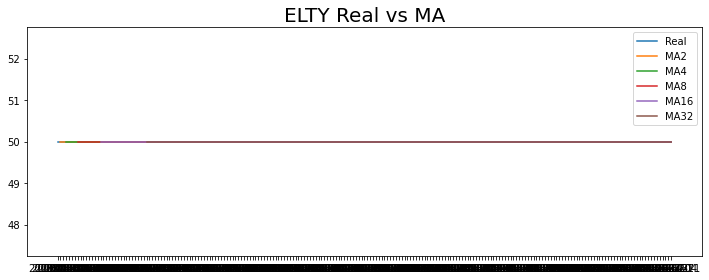

In [45]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(df_elty['Close'], label="Real")
line2, = plt.plot(df_elty['MA2'], label="MA2")
line3, = plt.plot(df_elty['MA4'], label="MA4")
line4, = plt.plot(df_elty['MA8'], label="MA8")
line5, = plt.plot(df_elty['MA16'], label="MA16")
line5, = plt.plot(df_elty['MA32'], label="MA32")
leg = plt.legend(loc='upper right')
plt.title('ELTY Real vs MA', fontsize=20)
plt.show()

In [46]:
df_elty=df_elty.dropna()

mse1 = (mean_squared_error(df_elty['Close'], df_elty['MA2'])).round(2)
mape1 = np.round(np.mean(np.abs(df_elty['Close']-df_elty['MA2'])/df_elty['Close'])*100,2)
mad1 = robust.mad(df_elty['MA2'])

mse2 = (mean_squared_error(df_elty['Close'], df_elty['MA4'])).round(2)
mape2 = np.round(np.mean(np.abs(df_elty['Close']-df_elty['MA4'])/df_elty['Close'])*100,2)
mad2 = robust.mad(df_elty['MA4'])

mse3 = (mean_squared_error(df_elty['Close'], df_elty['MA8'])).round(2)
mape3 = np.round(np.mean(np.abs(df_elty['Close']-df_elty['MA8'])/df_elty['Close'])*100,2)
mad3 = robust.mad(df_elty['MA8'])

mse4 = (mean_squared_error(df_elty['Close'], df_elty['MA16'])).round(2)
mape4 = np.round(np.mean(np.abs(df_elty['Close']-df_elty['MA16'])/df_elty['Close'])*100,2)
mad4 = robust.mad(df_elty['MA16'])

mse5 = (mean_squared_error(df_elty['Close'], df_elty['MA32'])).round(2)
mape5 = np.round(np.mean(np.abs(df_elty['Close']-df_elty['MA32'])/df_elty['Close'])*100,2)
mad5 = robust.mad(df_elty['MA32'])

results = pd.DataFrame({'ELTY':['MA2 forecast','MA4 forecast','MA8 forecast','MA16 forecast','MA32 forecast'], 
                        'MAPE': [mape1, mape2, mape3, mape4, mape5,], 
                        'MSE': [mse1, mse2, mse3, mse4, mse5], 
                        'MAD': [mad1, mad2, mad3, mad4, mad5]})
results = results[['ELTY', 'MAD', 'MSE', 'MAPE']]
results

,ELTY,MAD,MSE,MAPE
0,MA2 forecast,0.0,0.0,0.0
1,MA4 forecast,0.0,0.0,0.0
2,MA8 forecast,0.0,0.0,0.0
3,MA16 forecast,0.0,0.0,0.0
4,MA32 forecast,0.0,0.0,0.0


## GAMA

In [47]:
df_gama['MA2'] = df_gama['Close'].rolling(2).mean()
df_gama['MA4'] = df_gama['Close'].rolling(4).mean()
df_gama['MA8'] = df_gama['Close'].rolling(8).mean()
df_gama['MA16'] = df_gama['Close'].rolling(16).mean()
df_gama['MA32'] = df_gama['Close'].rolling(32).mean()

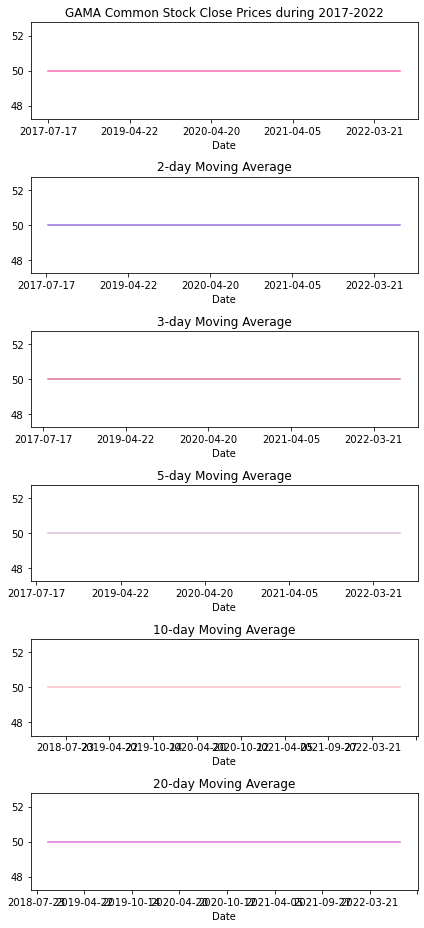

In [48]:
# Set figure buat plot
fig = plt.figure(figsize=(6, 13))

# Plot untuk data riil
ax = fig.add_subplot(6,1,1)
df_gama['Close'].plot(ax=ax, color='hotpink')
ax.set_title('GAMA Common Stock Close Prices during 2017-2022')

# Plot untuk 2-day MA
ax = fig.add_subplot(6,1,2)
df_gama['MA2'].plot(ax=ax, color='mediumpurple')
ax.set_title('2-day Moving Average')

# Plot untuk 3-day MA
ax = fig.add_subplot(6,1,3)
df_gama['MA4'].plot(ax=ax, color='palevioletred')
ax.set_title('3-day Moving Average')

# Plot untuk 5-day MA
ax = fig.add_subplot(6,1,4)
df_gama['MA8'].plot(ax=ax, color='thistle')
ax.set_title('5-day Moving Average')

# Plot untuk 10-day MA
ax = fig.add_subplot(6,1,5)
df_gama['MA16'].plot(ax=ax, color='pink')
ax.set_title('10-day Moving Average')

# Plot untuk 20-day MA
ax = fig.add_subplot(6,1,6)
df_gama['MA32'].plot(ax=ax, color='orchid')
ax.set_title('20-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

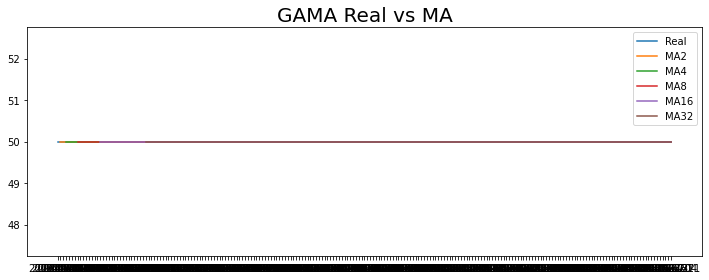

In [49]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(df_gama['Close'], label="Real")
line2, = plt.plot(df_gama['MA2'], label="MA2")
line3, = plt.plot(df_gama['MA4'], label="MA4")
line4, = plt.plot(df_gama['MA8'], label="MA8")
line5, = plt.plot(df_gama['MA16'], label="MA16")
line5, = plt.plot(df_gama['MA32'], label="MA32")
leg = plt.legend(loc='upper right')
plt.title('GAMA Real vs MA', fontsize=20)
plt.show()

In [50]:
df_gama=df_gama.dropna()

mse1 = (mean_squared_error(df_gama['Close'], df_gama['MA2'])).round(2)
mape1 = np.round(np.mean(np.abs(df_gama['Close']-df_gama['MA2'])/df_gama['Close'])*100,2)
mad1 = robust.mad(df_gama['MA2'])

mse2 = (mean_squared_error(df_gama['Close'], df_gama['MA4'])).round(2)
mape2 = np.round(np.mean(np.abs(df_gama['Close']-df_gama['MA4'])/df_gama['Close'])*100,2)
mad2 = robust.mad(df_gama['MA4'])

mse3 = (mean_squared_error(df_gama['Close'], df_gama['MA8'])).round(2)
mape3 = np.round(np.mean(np.abs(df_gama['Close']-df_gama['MA8'])/df_gama['Close'])*100,2)
mad3 = robust.mad(df_gama['MA8'])

mse4 = (mean_squared_error(df_gama['Close'], df_gama['MA16'])).round(2)
mape4 = np.round(np.mean(np.abs(df_gama['Close']-df_gama['MA16'])/df_gama['Close'])*100,2)
mad4 = robust.mad(df_gama['MA16'])

mse5 = (mean_squared_error(df_gama['Close'], df_gama['MA32'])).round(2)
mape5 = np.round(np.mean(np.abs(df_gama['Close']-df_gama['MA32'])/df_gama['Close'])*100,2)
mad5 = robust.mad(df_gama['MA32'])

results = pd.DataFrame({'GAMA':['MA2 forecast','MA4 forecast','MA8 forecast','MA16 forecast','MA32 forecast'], 
                        'MAPE': [mape1, mape2, mape3, mape4, mape5,], 
                        'MSE': [mse1, mse2, mse3, mse4, mse5], 
                        'MAD': [mad1, mad2, mad3, mad4, mad5]})
results = results[['GAMA', 'MAD', 'MSE', 'MAPE']]
results

,GAMA,MAD,MSE,MAPE
0,MA2 forecast,0.0,0.0,0.0
1,MA4 forecast,0.0,0.0,0.0
2,MA8 forecast,0.0,0.0,0.0
3,MA16 forecast,0.0,0.0,0.0
4,MA32 forecast,0.0,0.0,0.0


# ASRI v SMRA Double MA

## ASRI

In [51]:
df_asri['MA2'] = df_asri['Close'].rolling(2).mean()
df_asri['MA4'] = df_asri['Close'].rolling(4).mean()
df_asri['MA8'] = df_asri['Close'].rolling(8).mean()
df_asri['MA16'] = df_asri['Close'].rolling(16).mean()
df_asri['MA32'] = df_asri['Close'].rolling(32).mean()

df_asri['DMA2'] = df_asri['MA2'].rolling(2).mean()
df_asri['DMA4'] = df_asri['MA4'].rolling(4).mean()
df_asri['DMA8'] = df_asri['MA8'].rolling(8).mean()
df_asri['DMA16'] = df_asri['MA16'].rolling(16).mean()
df_asri['DMA32'] = df_asri['MA32'].rolling(32).mean()

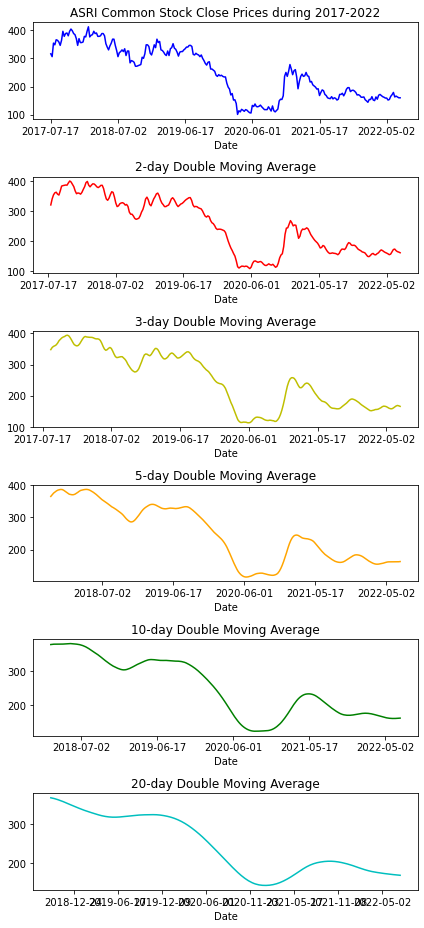

In [52]:
# Set figure buat plot
fig = plt.figure(figsize=(6, 13))

# Plot untuk data riil
ax = fig.add_subplot(6,1,1)
df_asri['Close'].plot(ax=ax, color='b')
ax.set_title('ASRI Common Stock Close Prices during 2017-2022')

# Plot untuk 2-day DMA
ax = fig.add_subplot(6,1,2)
df_asri['DMA2'].plot(ax=ax, color='r')
ax.set_title('2-day Double Moving Average')

# Plot untuk 3-day DMA
ax = fig.add_subplot(6,1,3)
df_asri['DMA4'].plot(ax=ax, color='y')
ax.set_title('3-day Double Moving Average')

# Plot untuk 5-day DMA
ax = fig.add_subplot(6,1,4)
df_asri['DMA8'].plot(ax=ax, color='orange')
ax.set_title('5-day Double Moving Average')

# Plot untuk 10-day DMA
ax = fig.add_subplot(6,1,5)
df_asri['DMA16'].plot(ax=ax, color='g')
ax.set_title('10-day Double Moving Average')

# Plot untuk 20-day DMA
ax = fig.add_subplot(6,1,6)
df_asri['DMA32'].plot(ax=ax, color='c')
ax.set_title('20-day Double Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

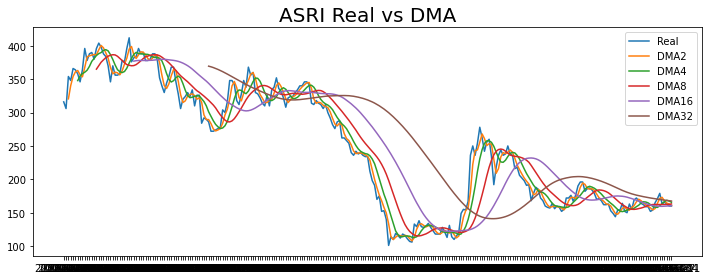

In [53]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(df_asri['Close'], label="Real")
line2, = plt.plot(df_asri['DMA2'], label="DMA2")
line3, = plt.plot(df_asri['DMA4'], label="DMA4")
line4, = plt.plot(df_asri['DMA8'], label="DMA8")
line5, = plt.plot(df_asri['DMA16'], label="DMA16")
line5, = plt.plot(df_asri['DMA32'], label="DMA32")
leg = plt.legend(loc='upper right')
plt.title('ASRI Real vs DMA', fontsize=20)
plt.show()

In [54]:
df_asri=df_asri.dropna()

mse1 = (mean_squared_error(df_asri['Close'], df_asri['DMA2'])).round(2)
mape1 = np.round(np.mean(np.abs(df_asri['Close']-df_asri['DMA2'])/df_asri['Close'])*100,2)
mad1 = robust.mad(df_asri['DMA2'])

mse2 = (mean_squared_error(df_asri['Close'], df_asri['DMA4'])).round(2)
mape2 = np.round(np.mean(np.abs(df_asri['Close']-df_asri['DMA4'])/df_asri['Close'])*100,2)
mad2 = robust.mad(df_asri['DMA4'])

mse3 = (mean_squared_error(df_asri['Close'], df_asri['DMA8'])).round(2)
mape3 = np.round(np.mean(np.abs(df_asri['Close']-df_asri['DMA8'])/df_asri['Close'])*100,2)
mad3 = robust.mad(df_asri['DMA8'])

mse4 = (mean_squared_error(df_asri['Close'], df_asri['DMA16'])).round(2)
mape4 = np.round(np.mean(np.abs(df_asri['Close']-df_asri['DMA16'])/df_asri['Close'])*100,2)
mad4 = robust.mad(df_asri['DMA16'])

mse5 = (mean_squared_error(df_asri['Close'], df_asri['DMA32'])).round(2)
mape5 = np.round(np.mean(np.abs(df_asri['Close']-df_asri['DMA32'])/df_asri['Close'])*100,2)
mad5 = robust.mad(df_asri['DMA32'])

results = pd.DataFrame({'ASRI':['DMA2 forecast','DMA4 forecast','DMA8 forecast','DMA16 forecast','DMA32 forecast'], 
                        'MAPE': [mape1, mape2, mape3, mape4, mape5,], 
                        'MSE': [mse1, mse2, mse3, mse4, mse5], 
                        'MAD': [mad1, mad2, mad3, mad4, mad5]})
results = results[['ASRI', 'MAD', 'MSE', 'MAPE']]
results

,ASRI,MAD,MSE,MAPE
0,DMA2 forecast,82.655074,103.47,3.54
1,DMA4 forecast,86.546905,371.44,6.91
2,DMA8 forecast,79.458213,1047.24,12.20
3,DMA16 forecast,93.861462,2527.35,19.87
4,DMA32 forecast,90.007275,5226.64,32.28


## SMRA 

In [55]:
df_smra['MA2'] = df_smra['Close'].rolling(2).mean()
df_smra['MA4'] = df_smra['Close'].rolling(4).mean()
df_smra['MA8'] = df_smra['Close'].rolling(8).mean()
df_smra['MA16'] = df_smra['Close'].rolling(16).mean()
df_smra['MA32'] = df_smra['Close'].rolling(32).mean()

df_smra['DMA2'] = df_smra['MA2'].rolling(2).mean()
df_smra['DMA4'] = df_smra['MA4'].rolling(4).mean()
df_smra['DMA8'] = df_smra['MA8'].rolling(8).mean()
df_smra['DMA16'] = df_smra['MA16'].rolling(16).mean()
df_smra['DMA32'] = df_smra['MA32'].rolling(32).mean()

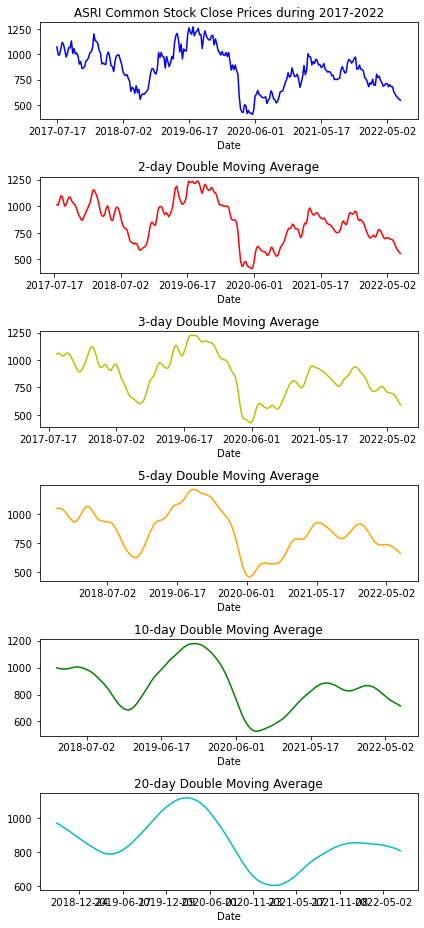

In [56]:
# Set figure buat plot
fig = plt.figure(figsize=(6, 13))

# Plot untuk data riil
ax = fig.add_subplot(6,1,1)
df_smra['Close'].plot(ax=ax, color='b')
ax.set_title('ASRI Common Stock Close Prices during 2017-2022')

# Plot untuk 2-day DMA
ax = fig.add_subplot(6,1,2)
df_smra['DMA2'].plot(ax=ax, color='r')
ax.set_title('2-day Double Moving Average')

# Plot untuk 3-day DMA
ax = fig.add_subplot(6,1,3)
df_smra['DMA4'].plot(ax=ax, color='y')
ax.set_title('3-day Double Moving Average')

# Plot untuk 5-day DMA
ax = fig.add_subplot(6,1,4)
df_smra['DMA8'].plot(ax=ax, color='orange')
ax.set_title('5-day Double Moving Average')

# Plot untuk 10-day DMA
ax = fig.add_subplot(6,1,5)
df_smra['DMA16'].plot(ax=ax, color='g')
ax.set_title('10-day Double Moving Average')

# Plot untuk 20-day DMA
ax = fig.add_subplot(6,1,6)
df_smra['DMA32'].plot(ax=ax, color='c')
ax.set_title('20-day Double Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

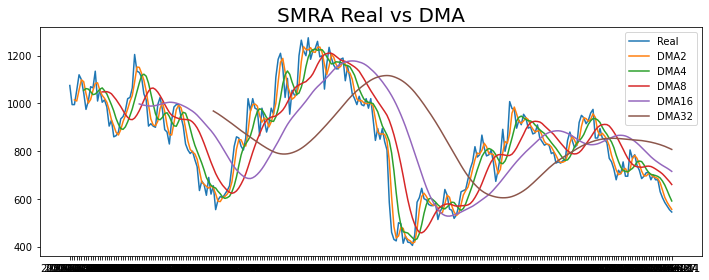

In [57]:
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
line1, = plt.plot(df_smra['Close'], label="Real")
line2, = plt.plot(df_smra['DMA2'], label="DMA2")
line3, = plt.plot(df_smra['DMA4'], label="DMA4")
line4, = plt.plot(df_smra['DMA8'], label="DMA8")
line5, = plt.plot(df_smra['DMA16'], label="DMA16")
line5, = plt.plot(df_smra['DMA32'], label="DMA32")
leg = plt.legend(loc='upper right')
plt.title('SMRA Real vs DMA', fontsize=20)
plt.show()

In [58]:
df_smra=df_smra.dropna()

mse1 = (mean_squared_error(df_smra['Close'], df_smra['DMA2'])).round(2)
mape1 = np.round(np.mean(np.abs(df_smra['Close']-df_smra['DMA2'])/df_smra['Close'])*100,2)
mad1 = robust.mad(df_smra['DMA2'])

mse2 = (mean_squared_error(df_smra['Close'], df_smra['DMA4'])).round(2)
mape2 = np.round(np.mean(np.abs(df_smra['Close']-df_smra['DMA4'])/df_smra['Close'])*100,2)
mad2 = robust.mad(df_smra['DMA4'])

mse3 = (mean_squared_error(df_smra['Close'], df_smra['DMA8'])).round(2)
mape3 = np.round(np.mean(np.abs(df_smra['Close']-df_smra['DMA8'])/df_smra['Close'])*100,2)
mad3 = robust.mad(df_smra['DMA8'])

mse4 = (mean_squared_error(df_smra['Close'], df_smra['DMA16'])).round(2)
mape4 = np.round(np.mean(np.abs(df_smra['Close']-df_smra['DMA16'])/df_smra['Close'])*100,2)
mad4 = robust.mad(df_smra['DMA16'])

mse5 = (mean_squared_error(df_smra['Close'], df_smra['DMA32'])).round(2)
mape5 = np.round(np.mean(np.abs(df_smra['Close']-df_smra['DMA32'])/df_smra['Close'])*100,2)
mad5 = robust.mad(df_smra['DMA32'])

results = pd.DataFrame({'SMRA':['DMA2 forecast','DMA4 forecast','DMA8 forecast','DMA16 forecast','DMA32 forecast'], 
                        'MAPE': [mape1, mape2, mape3, mape4, mape5,], 
                        'MSE': [mse1, mse2, mse3, mse4, mse5], 
                        'MAD': [mad1, mad2, mad3, mad4, mad5]})
results = results[['SMRA', 'MAD', 'MSE', 'MAPE']]
results

,SMRA,MAD,MSE,MAPE
0,DMA2 forecast,203.857805,1984.79,4.07
1,DMA4 forecast,188.032006,6367.51,7.69
2,DMA8 forecast,187.564408,15295.48,13.25
3,DMA16 forecast,159.292867,35539.03,20.70
4,DMA32 forecast,111.222622,71202.94,30.78
